In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
tickers = ['GBPUSD=X', 'CL=F', '^TNX']
data_set = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']
data_set.columns = ['CRUDEOIL', 'GBPUSD', 'UST10Y']

/tmp/ipython-input-576793170.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_set = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  3 of 3 completed


In [ ]:
data_set

,CRUDEOIL,GBPUSD,UST10Y
Date,,,
2020-01-01,NaN,1.326260,NaN
2020-01-02,61.180000,1.325030,1.882
2020-01-03,63.049999,1.315270,1.788
2020-01-06,63.270000,1.308010,1.811
2020-01-07,62.700001,1.317003,1.827
...,...,...,...
2024-12-24,70.099998,1.253447,4.591
2024-12-25,NaN,1.253604,NaN
2024-12-26,69.620003,1.254375,4.579


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2020-01-01 to 2024-12-30
Freq: B
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRUDEOIL  1257 non-null   float64
 1   GBPUSD    1304 non-null   float64
 2   UST10Y    1257 non-null   float64
dtypes: float64(3)
memory usage: 40.8 KB


In [ ]:
# Handle missing/inf values properly
data_set = data_set.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
data_set = data_set.dropna()  # Drop any remaining NaN values

In [ ]:
# Extract the series
gbpusd = data_set.GBPUSD
crude = data_set.CRUDEOIL
ust10 = data_set.UST10Y

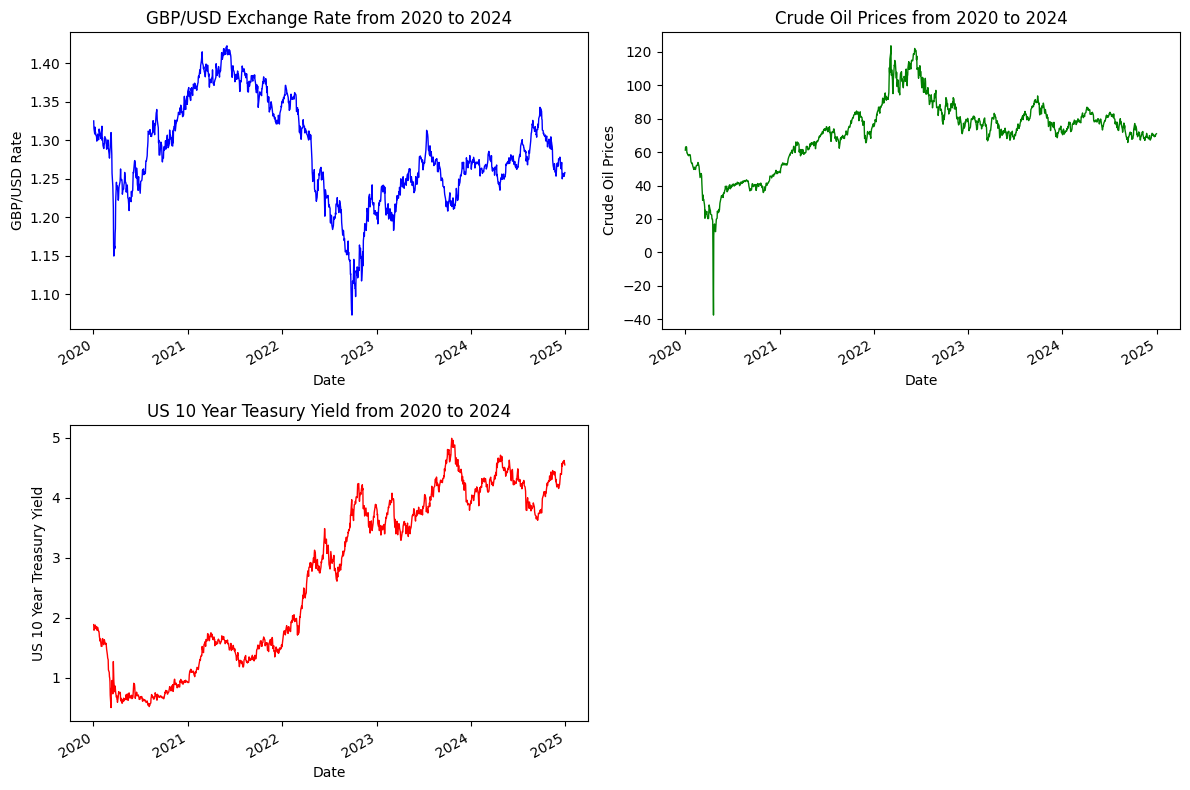

In [ ]:
# Create time plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

gbpusd.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="GBP/USD Rate",
    title="GBP/USD Exchange Rate from 2020 to 2024",
    ax=axs[0, 0],
    color='blue'
)

crude.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Crude Oil Prices",
    title="Crude Oil Prices from 2020 to 2024",
    ax=axs[0, 1],
    color='green'
)

ust10.plot(
        linewidth=1,
        xlabel="Date",
        ylabel="US 10 Year Treasury Yield",
        title="US 10 Year Teasury Yield from 2020 to 2024",
        ax=axs[1, 0],
        color='red'
    )

axs[1, 1].axis("off")
fig.tight_layout()
plt.show()

**Test for unit root**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 8.8 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import ADF
gbpusd_adf = ADF(gbpusd, trend="n", method="bic")
crude_adf = ADF(crude, trend="n", method="bic")
ust10_adf = ADF(ust10, trend="n", method="bic")

pd.DataFrame(
    {
      "GBPUSD Forex Rate": (gbpusd_adf.stat, gbpusd_adf.critical_values["5%"]),
      "| CRUDE OIL Prices": (crude_adf.stat, crude_adf.critical_values["5%"]),
      "| US 10 Year Treasury Yield": (ust10_adf.stat, ust10_adf.critical_values["5%"],
      ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)

,GBPUSD Forex Rate,| CRUDE OIL Prices,| US 10 Year Treasury Yield
ADF Test Statistic,-0.361508,-0.386843,0.877499
5% Critical Value,-1.941216,-1.941216,-1.941216


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


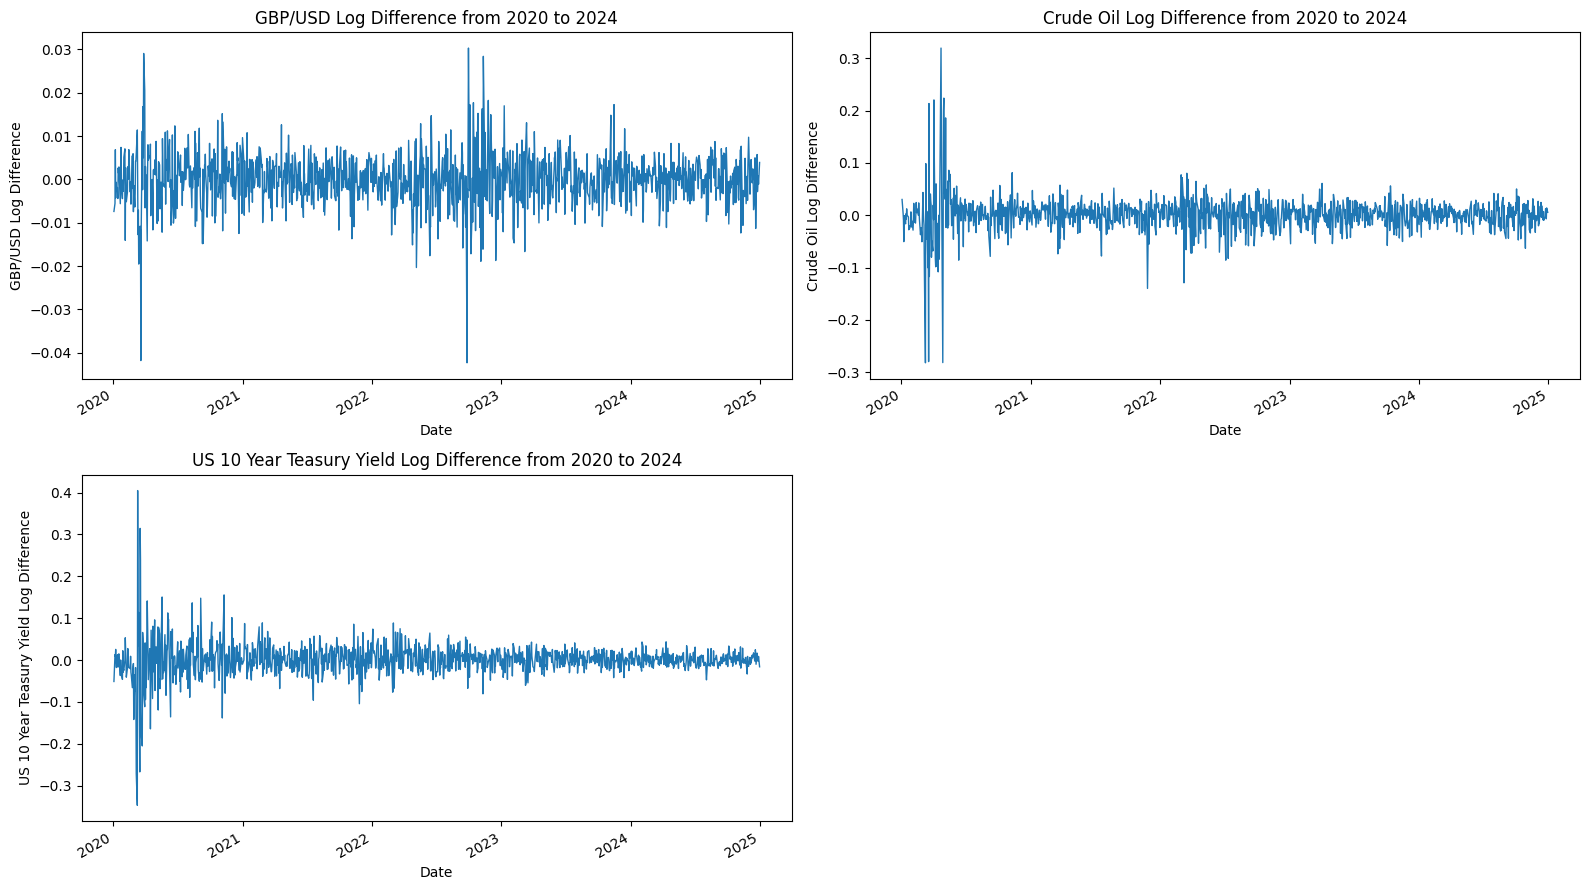

In [ ]:
# Time Plots for Differenced GBPUSD, CRUDE OIL, ust10
fig, axs = plt.subplots(2, 2)

lgbpusd = np.log(gbpusd).diff().dropna()
lgbpusd.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="GBP/USD Log Difference",
    title="GBP/USD Log Difference from 2020 to 2024",
    ax=axs[0, 0],
)

lcrude = np.log(crude).diff().dropna()
lcrude.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Crude Oil Log Difference",
    title="Crude Oil Log Difference from 2020 to 2024",
    ax=axs[0, 1],
)

lust10 = np.log(ust10).diff().dropna()
lust10.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="US 10 Year Teasury Yield Log Difference",
    title="US 10 Year Teasury Yield Log Difference from 2020 to 2024",
    ax=axs[1, 0],
)

axs[1, 1].axis("off")
fig.tight_layout()
plt.show()

In [ ]:
# ADF Test Results with 5% Significance Level for Differenced GBPUSD, CRUDE OIL, UST10Y
lgbpusd_adf = ADF(lgbpusd, trend="n", method="bic")
lcrude_adf = ADF(lcrude, trend="n", method="bic")
lust10_adf = ADF(lust10, trend="n", method="bic")

pd.DataFrame(
    {
      "GBPUSD Forex Rate": (lgbpusd_adf.stat, lgbpusd_adf.critical_values["5%"]),
      "| CRUDE OIL Price": (lcrude_adf.stat, lcrude_adf.critical_values["5%"]),
      "| US 10 Year Treasury Yield": (lust10_adf.stat, lust10_adf.critical_values["5%"],
      ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)

,GBPUSD Forex Rate,| CRUDE OIL Price,| US 10 Year Treasury Yield
ADF Test Statistic,-34.101909,-34.014029,-15.132498
5% Critical Value,-1.941216,-1.941216,-1.941217


All three log-differenced series are stationary at the 5% significance level

**Test for Cointegration**

In [ ]:
from statsmodels.tsa.api import VAR
# Selection of Number of Lags for VEC Model
vecm_data = pd.concat(
    [gbpusd, crude, ust10], axis=1
)

# Fit VAR model and run lag selection tool
model = VAR(vecm_data)
x = model.select_order(maxlags=7, trend="c")
x.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,0.4439,0.4562,1.559,0.4485
1,-13.28,-13.23,1.711e-06,-13.26
2,-13.39,-13.30*,1.534e-06,-13.35
3,-13.42,-13.30,1.485e-06,-13.37*
4,-13.42*,-13.26,1.482e-06*,-13.36
5,-13.41,-13.22,1.497e-06,-13.34
6,-13.40,-13.17,1.508e-06,-13.32
7,-13.41,-13.13,1.507e-06,-13.30


In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen
# Johansen Trace Test Result for GBPUSD, CRUDE OIL, and UST10Y

jtest = coint_johansen(vecm_data, det_order=0, k_ar_diff=1)

# Print the results
print(f"Eigenvalues of VECM coefficient matrix : {jtest.eig}\n")

pd.DataFrame(
    {
        "Test statistic": jtest.trace_stat,
        "Critical values (90%)": jtest.trace_stat_crit_vals[:, 0],
        "Critical values (95%)": jtest.trace_stat_crit_vals[:, 1],
        "Critical values (99%)": jtest.trace_stat_crit_vals[:, 2],
    },
    index=["rank=0", "rank<=1", "rank<=2"],
)

Eigenvalues of VECM coefficient matrix : [0.00860826 0.00534022 0.00040972]



,Test statistic,Critical values (90%),Critical values (95%),Critical values (99%)
rank=0,18.084384,27.0669,29.7961,35.4628
rank<=1,7.234244,13.4294,15.4943,19.9349
rank<=2,0.514309,2.7055,3.8415,6.6349


No cointegration exists among GBPUSD, Crude Oil, and UST10Y at the 95% significance level.
The test fails to reject the null of zero cointegrating relationships.
The three series do not share a stable long-run equilibrium relationship in this sample.

**VAR Model**

In [ ]:
# VAR Model Lag Selection for Differenced GBPUSD, CRUDE OIL, UST10Y

# Join log time series in one DataFrame
diff_data = pd.concat([lgbpusd, lcrude, lust10], axis=1)

In [ ]:
diff_data.isnull().sum()

,0
GBPUSD,0
CRUDEOIL,2
UST10Y,0


In [ ]:
diff_data = diff_data.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
diff_data = diff_data.dropna()  # Drop any remaining NaN values

In [ ]:
# Fit VAR model and run lag selection tool
model = VAR(diff_data)
x = model.select_order(maxlags=12, trend="c")
x.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-23.58,-23.57*,5.739e-11,-23.58
1,-23.61,-23.56,5.585e-11,-23.59
2,-23.64,-23.56,5.396e-11,-23.61
3,-23.68,-23.55,5.213e-11,-23.63
4,-23.69,-23.53,5.143e-11,-23.63
5,-23.71,-23.51,5.034e-11,-23.64
6,-23.72,-23.49,4.971e-11,-23.64
7,-23.77,-23.50,4.758e-11,-23.67*
8,-23.76,-23.45,4.784e-11,-23.65
9,-23.76,-23.42,4.783e-11,-23.63


In [ ]:
# VAR(12) model for Differenced GBPUSD, CRUDE OIL, UST10Y
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    maxlags=12,
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic="aic",  # ic=None => automatic lag selection
    method="ols",
    trend="c",
    verbose=True,
)
diff_mod_var.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 12, BIC -> 0, FPE -> 12, HQIC ->  7>
Using 12 based on aic criterion


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Sep, 2025
Time:                     15:25:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -23.3141
Nobs:                     1242.00    HQIC:                  -23.5999
Log likelihood:           9586.52    FPE:                4.74155e-11
AIC:                     -23.7721    Det(Omega_mle):     4.34184e-11
--------------------------------------------------------------------
Results for equation GBPUSD
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.000030         0.000161           -0.185           0.853
L1.GBPUSD            0.012855         0.028827            0.446           0.656
L1.CRUDEOIL          0.026430         0.005097            5.185

In [ ]:
# VAR(7) model for Differenced GBPUSD, CRUDE OIL, UST10Y
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    maxlags=12,
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic="hqic",  # ic=None => automatic lag selection
    method="ols",
    trend="c",
    verbose=True,
)
diff_mod_var.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 12, BIC -> 0, FPE -> 12, HQIC ->  7>
Using 7 based on hqic criterion


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Sep, 2025
Time:                     15:25:24
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -23.5057
Nobs:                     1247.00    HQIC:                  -23.6751
Log likelihood:           9582.81    FPE:                4.71752e-11
AIC:                     -23.7772    Det(Omega_mle):     4.47640e-11
--------------------------------------------------------------------
Results for equation GBPUSD
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000031         0.000161           -0.190           0.849
L1.GBPUSD           0.012805         0.028624            0.447           0.655
L1.CRUDEOIL         0.025653         0.004969            5.162     

In [ ]:
# Get the lag order that was selected
lag_order = diff_mod_var.k_ar
print(lag_order)

7


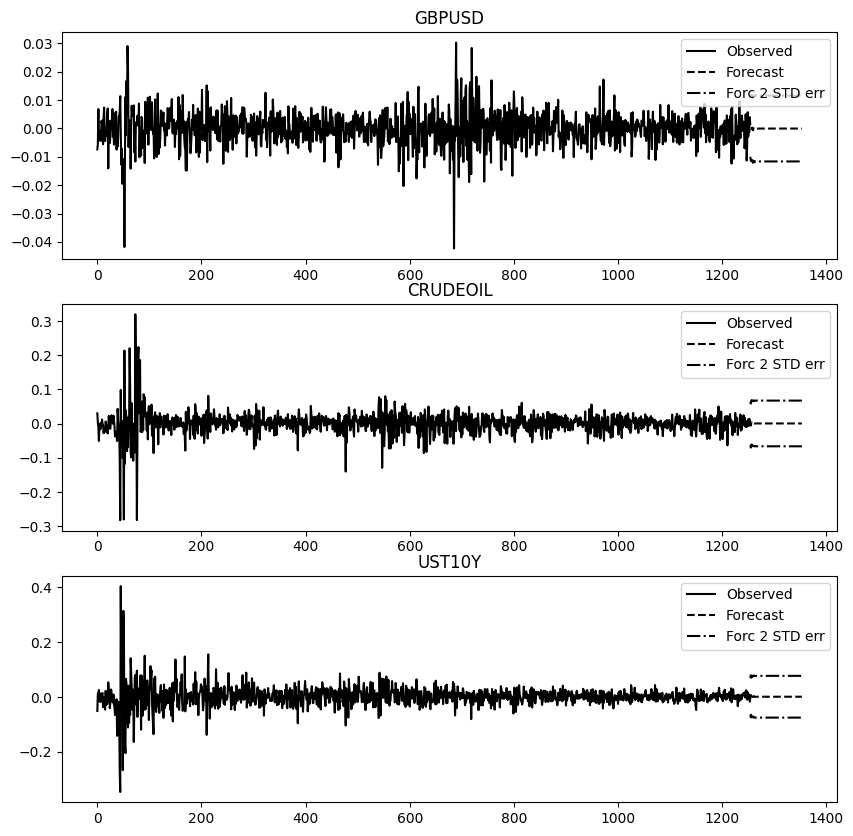

In [ ]:
# VAR Model Forecast of the Differenced GBPUSD, CRUDE OIL, UST10Y
diff_mod_var.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.savefig("VAR Model Forecast of the Differenced.png", dpi=300)
plt.show()

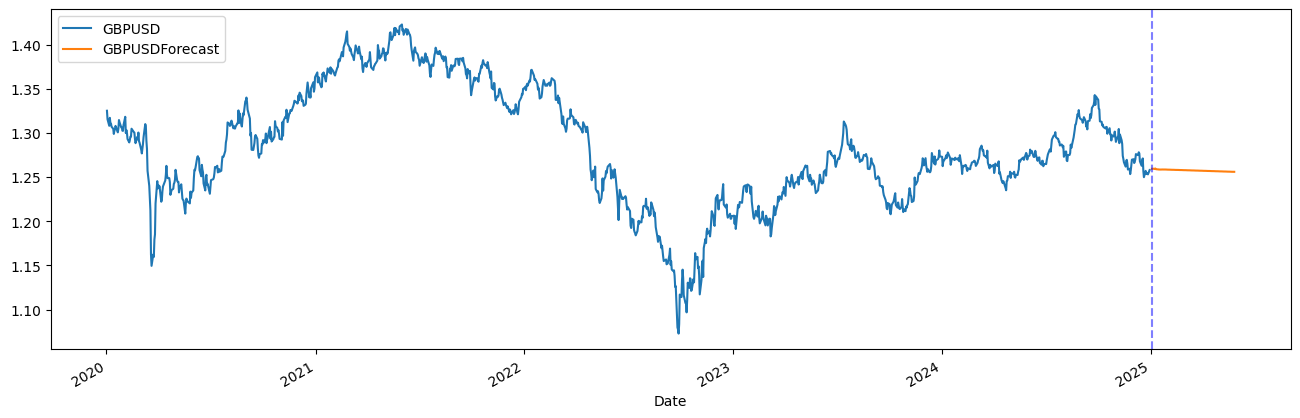

In [ ]:
# VAR Model Forecast of Level of GBPUSD, CRUDEOIL, UST10Y
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# get 100 step prediction values for differenced data
# drop NA values at start
diff_data_val = diff_data.values[diff_mod_var.k_ar :]  # noQA E203
pred = diff_mod_var.forecast(y=diff_data_val, steps=100)
pd.DataFrame(pred)

# extend index with 100 more business dates per USFederalHolidayCalendar
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
idx = pd.date_range("2025-01-03", periods=100, freq=us_bd)
df_forecast = pd.DataFrame(
    data=pred, index=idx, columns=["GBPUSD1d", "CRUDEOIL1d", "UST10Y1d"]
)

# Get the last log values
last_log_gbpusd = np.log(data_set["GBPUSD"].iloc[-1])
last_log_crude = np.log(data_set["CRUDEOIL"].iloc[-1])
last_log_ust10 = np.log(data_set["UST10Y"].iloc[-1])

# Convert log-differences to log-levels by cumulative sum
df_forecast["GBPUSD_log_level"] = last_log_gbpusd + df_forecast["GBPUSD1d"].cumsum()
df_forecast["CRUDEOIL_log_level"] = last_log_crude + df_forecast["CRUDEOIL1d"].cumsum()
df_forecast["UST10Y_log_level"] = last_log_ust10 + df_forecast["UST10Y1d"].cumsum()

# Convert log-levels back to original levels using exponential
df_forecast["GBPUSDForecast"] = np.exp(df_forecast["GBPUSD_log_level"])
df_forecast["CRUDEOILForecast"] = np.exp(df_forecast["CRUDEOIL_log_level"])
df_forecast["UST10YForecast"] = np.exp(df_forecast["UST10Y_log_level"])


# plot initial data with forecasted values for GBPUSD
data_set["GBPUSD"].plot(figsize=(16, 5), legend=True)
df_forecast["GBPUSDForecast"].plot(legend=True)
plt.axvline(x="2025-01-03", color="b", alpha=0.5, linestyle="--")
plt.savefig("GBPUSD Forecast.png", dpi=300)
plt.show()

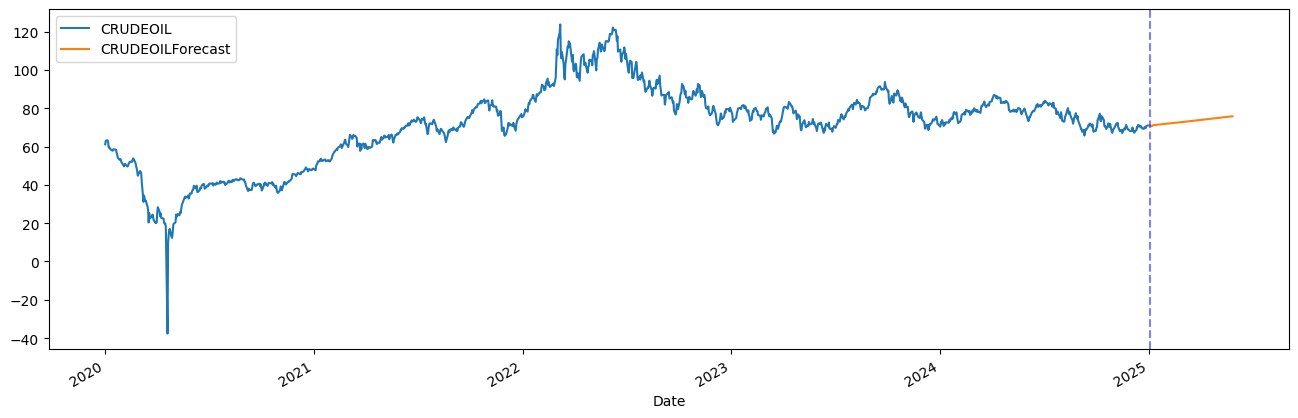

In [ ]:
# plot initial data with forecasted values for CRUDE OIL
data_set["CRUDEOIL"].plot(figsize=(16, 5), legend=True)
df_forecast["CRUDEOILForecast"].plot(legend=True)
plt.axvline(x="2025-01-03", color="b", alpha=0.5, linestyle="--")
plt.savefig("CRUDE OIL Forecast.png", dpi=300)
plt.show()

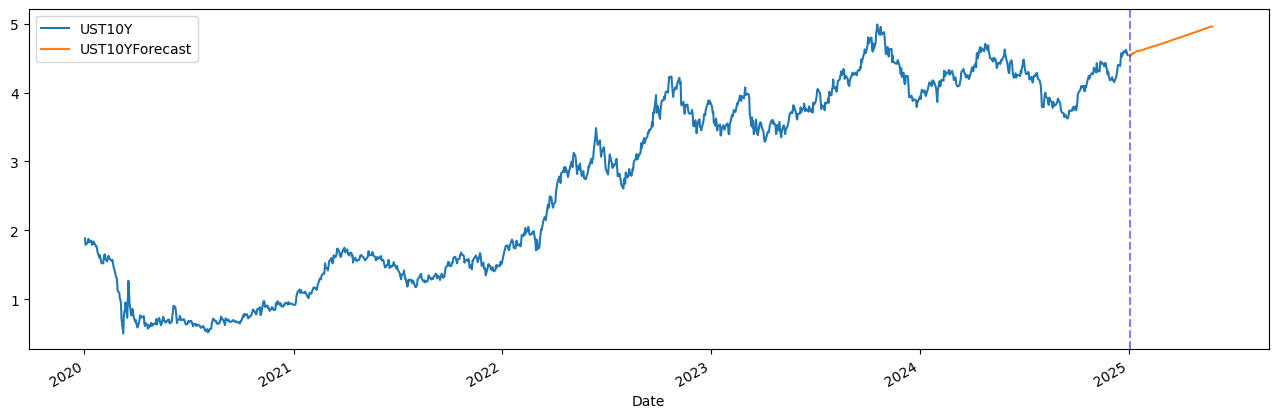

In [ ]:
# plot initial data with forecasted values for UST10Y
data_set["UST10Y"].plot(figsize=(16, 5), legend=True)
df_forecast["UST10YForecast"].plot(legend=True)
plt.axvline(x="2025-01-03", color="b", alpha=0.5, linestyle="--")
plt.savefig("US10Y Forecast.png", dpi=300)
plt.show()

## Diagnosis

In [ ]:
residuals = diff_mod_var.resid

In [ ]:
from scipy.stats import jarque_bera

jb_test_gbpusd = jarque_bera(residuals.iloc[:, 0])
jb_test_oil = jarque_bera(residuals.iloc[:, 1])
jb_test_yield = jarque_bera(residuals.iloc[:, 2])

print("\nJarque-Bera Test p-values (H0: Normality):")
print(f"GBPUSD residuals: p = {jb_test_gbpusd.pvalue:.4f}")
print(f"Crude Oil residuals: p = {jb_test_oil.pvalue:.4f}")
print(f"UST10Y residuals: p = {jb_test_yield.pvalue:.4f}")


Jarque-Bera Test p-values (H0: Normality):
GBPUSD residuals: p = 0.0000
Crude Oil residuals: p = 0.0000
UST10Y residuals: p = 0.0000


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test for serial correlation in residuals (Ljung-Box)
print("Ljung-Box p-values (H0: No serial correlation):")
print("GBPUSD:", acorr_ljungbox(residuals.iloc[:, 0], lags=[10], return_df=True).iloc[0, 1])
print("Crude Oil:", acorr_ljungbox(residuals.iloc[:, 1], lags=[10], return_df=True).iloc[0, 1])
print("UST10Y:", acorr_ljungbox(residuals.iloc[:, 2], lags=[10], return_df=True).iloc[0, 1])

Ljung-Box p-values (H0: No serial correlation):
GBPUSD: 0.47658255729300947
Crude Oil: 0.9978951792523418
UST10Y: 0.8350170974882622


In [ ]:
import statsmodels.api as sm

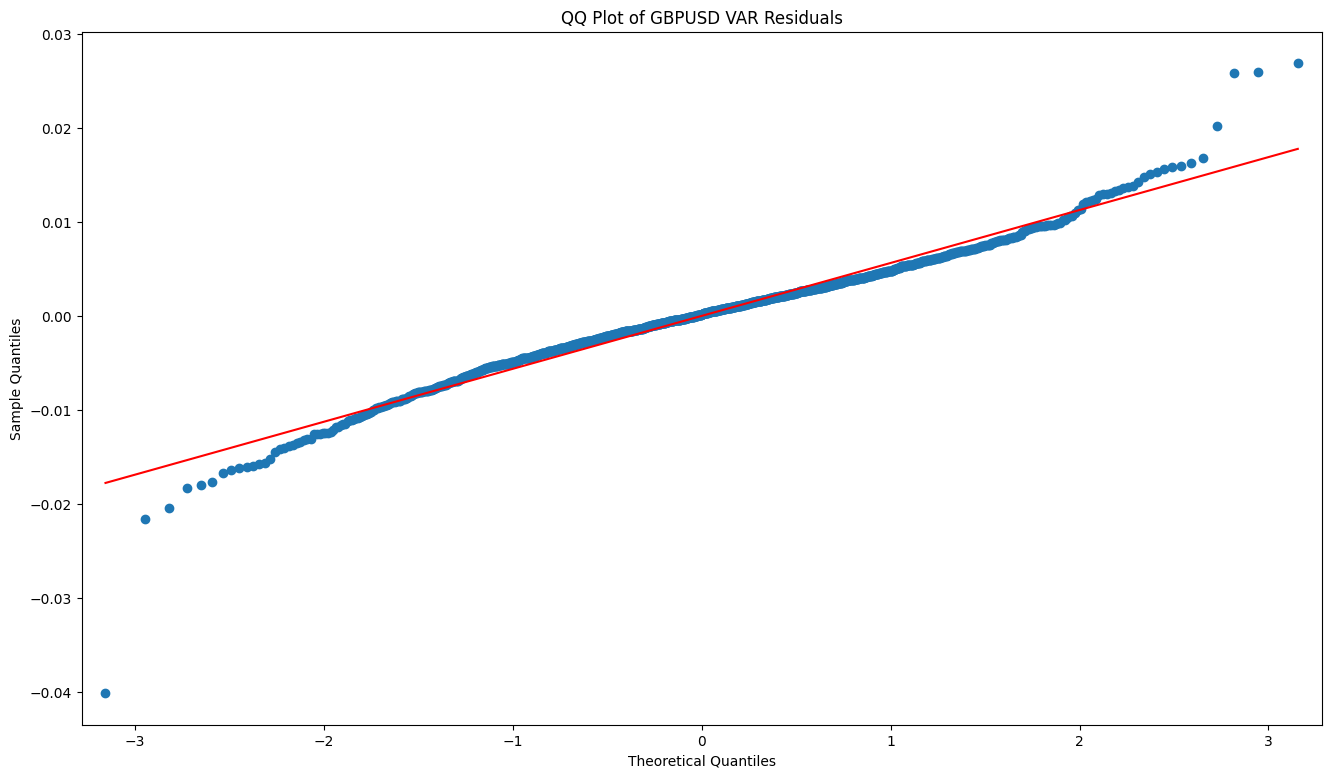

In [ ]:
# QQ plot for GBPUSD residuals
sm.qqplot(residuals.iloc[:, 0], line='s')
plt.title("QQ Plot of GBPUSD VAR Residuals")
plt.savefig("QQ Plot of GBPUSD VAR Residuals.png",dpi=300)
plt.show()


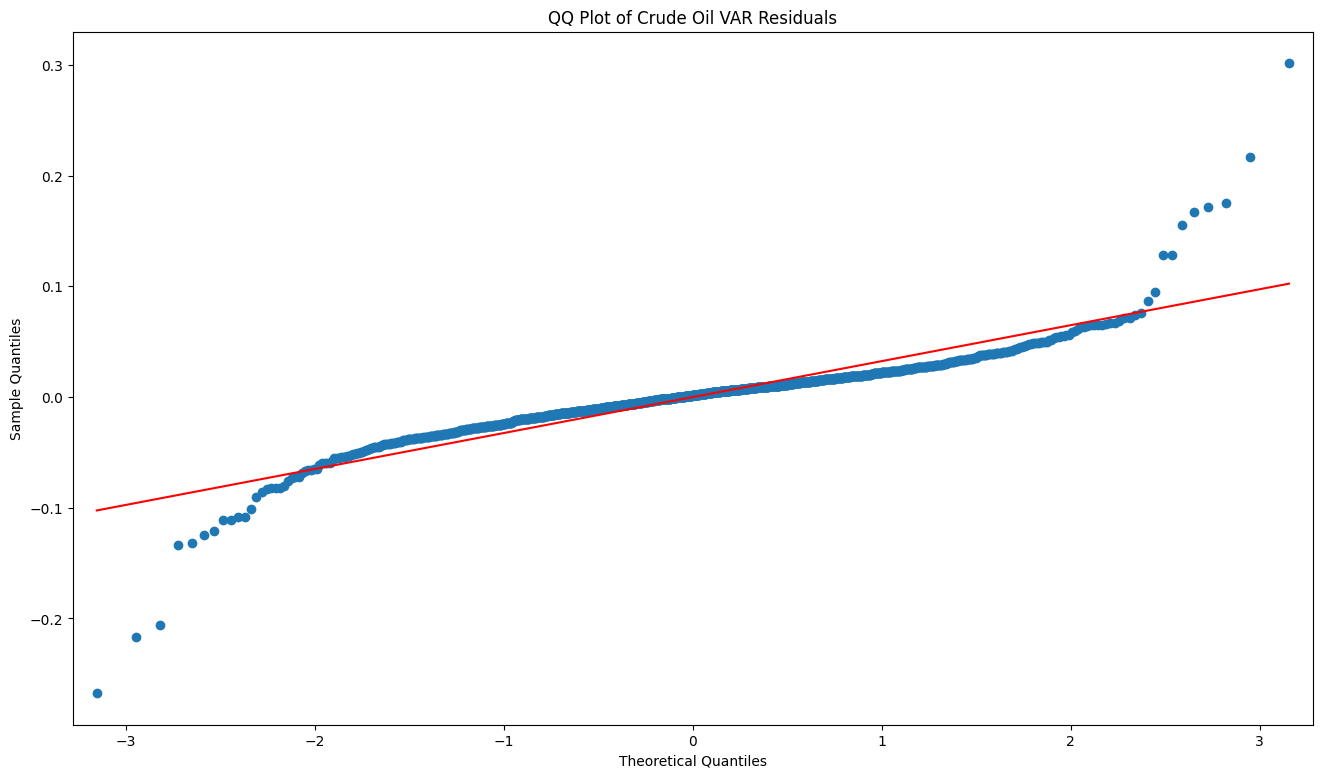

In [ ]:
# QQ plot for Crude Oil residuals
sm.qqplot(residuals.iloc[:, 1], line='s')
plt.title("QQ Plot of Crude Oil VAR Residuals")
plt.savefig("QQ Plot of CRUDE OIL VAR Residuals.png",dpi=300)
plt.show()

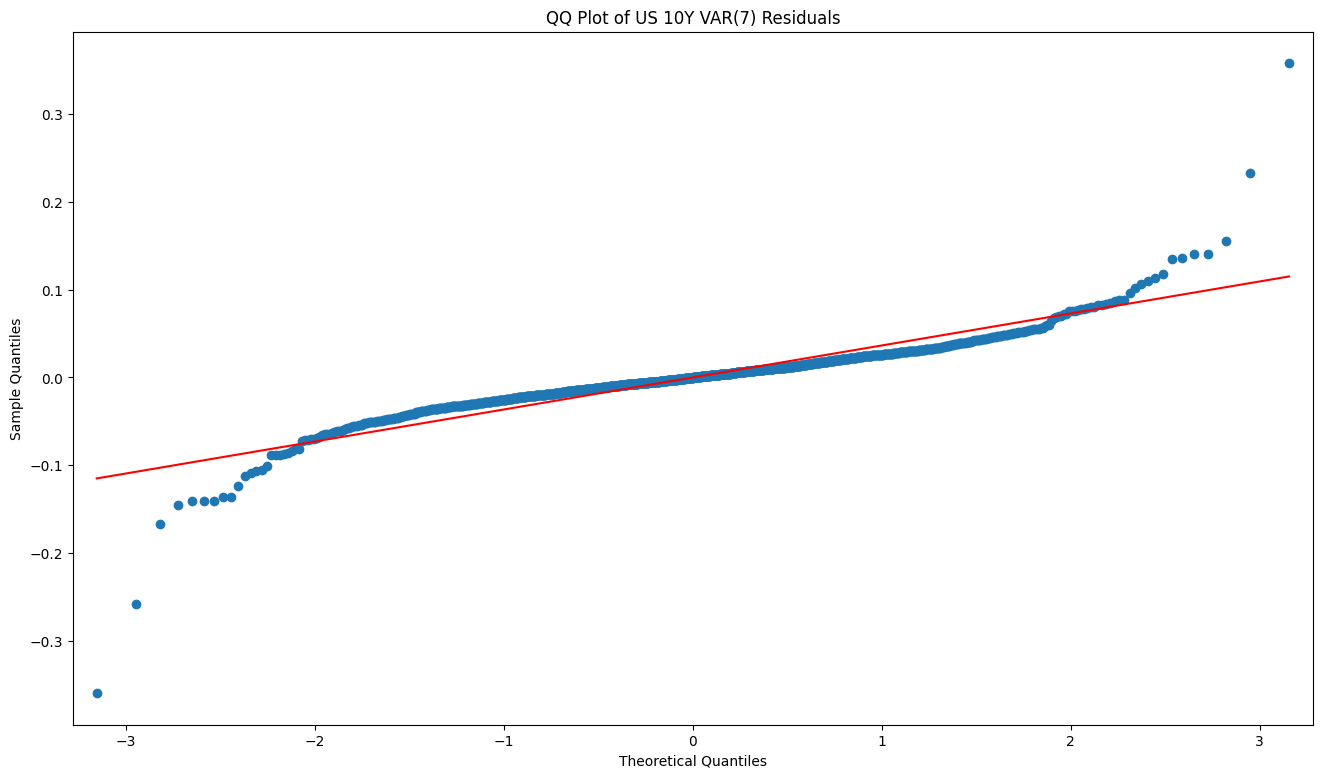

In [ ]:
# QQ plot for US 10Y residuals
sm.qqplot(residuals.iloc[:, 2], line='s')
plt.title("QQ Plot of US 10Y VAR(7) Residuals")
plt.savefig("QQ Plot of UST10 VAR Residuals.png",dpi=300)
plt.show()

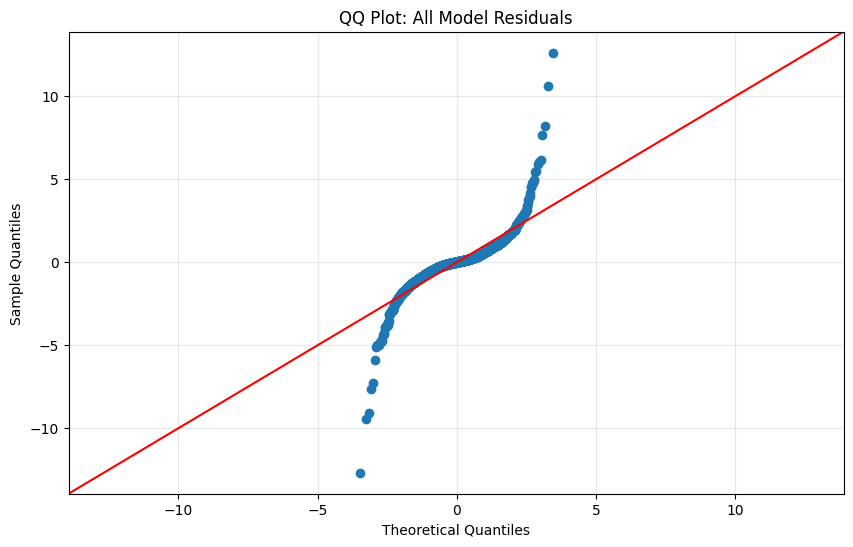

In [ ]:
from statsmodels.graphics.gofplots import qqplot
all_residuals = residuals.values.flatten()  # Flatten all residuals into one array
all_residuals_standardized = (all_residuals - all_residuals.mean()) / all_residuals.std()
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(all_residuals_standardized, line='45', fit=True, ax=ax)
ax.set_title('QQ Plot: All Model Residuals')
ax.grid(True, alpha=0.3)
plt.savefig("qq plot all.png",dpi=300)
plt.show()